<>:7: SyntaxWarning: invalid escape sequence '\j'
<>:7: SyntaxWarning: invalid escape sequence '\j'
C:\Users\ashok\AppData\Local\Temp\ipykernel_15308\4281280456.py:7: SyntaxWarning: invalid escape sequence '\j'
  df = pd.read_csv('C:\jupyter folder\medical_examination.csv')


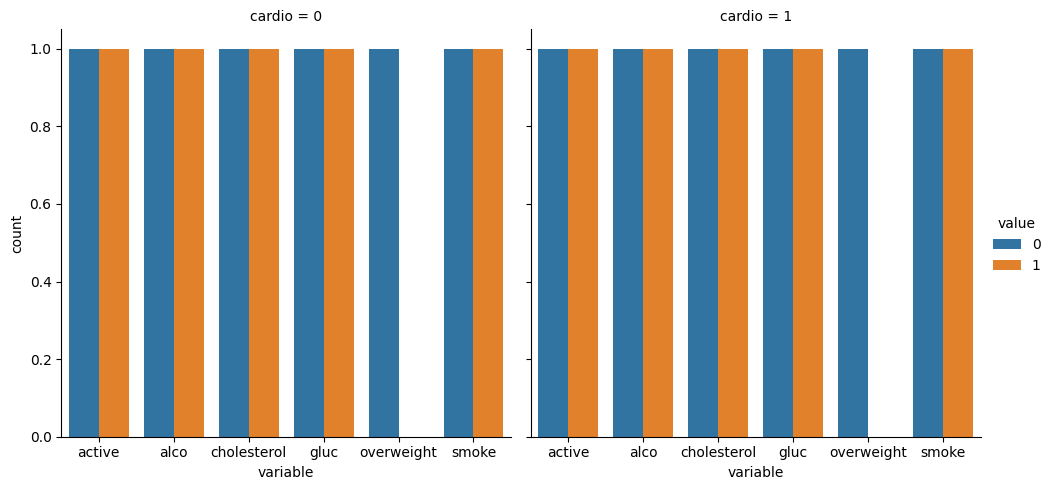

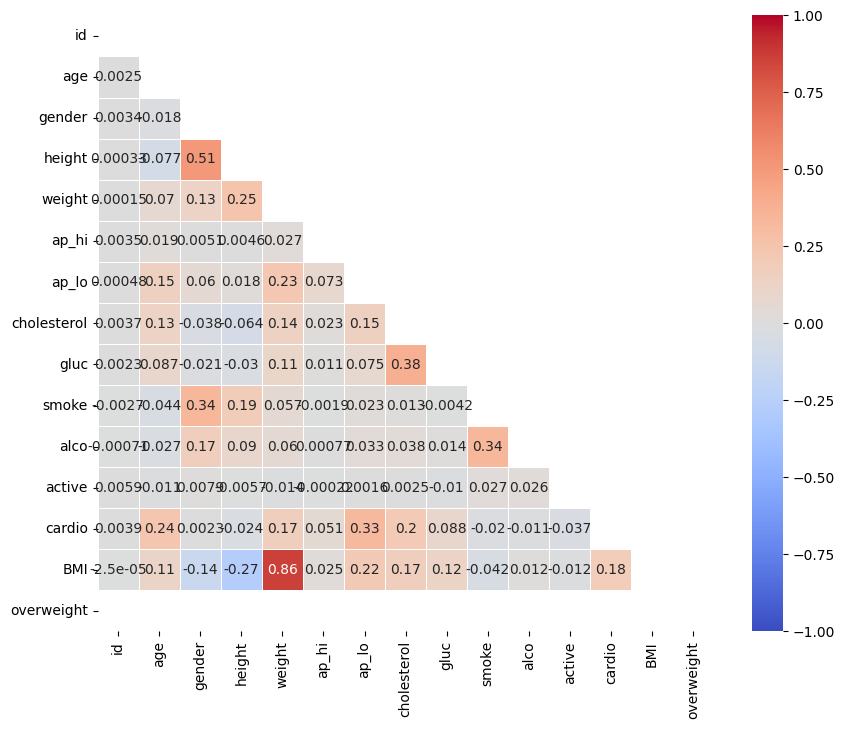

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Import the data from medical_examination.csv and assign it to the df variable
df = pd.read_csv('C:\jupyter folder\medical_examination.csv')

# 2. Create the overweight column in the df variable
df['BMI'] = df['weight'] / (df['height'] ** 2)
df['overweight'] = (df['BMI'] > 25).astype(int)

# 3. Normalize data by making 0 always good and 1 always bad.
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

# 4. Draw the Categorical Plot in the draw_cat_plot function
def draw_cat_plot():
    # Create a DataFrame for the cat plot
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='count')

    # Create the catplot
    fig = sns.catplot(x='variable', hue='value', col='cardio', kind='count', data=df_cat).fig
    return fig

# 5. Draw the Heat Map in the draw_heat_map function
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # Plot the heatmap
    sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)
    plt.show()

# Call the functions to execute the plotting
draw_cat_plot()
draw_heat_map()
